<a href="https://colab.research.google.com/github/Navya003/NLP/blob/main/English_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import re

import os

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
%matplotlib inline

import plotly.graph_objects as go

import numpy as np

import nltk
nltk.download('punkt')

!pip install category_encoders
import category_encoders as ce

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# improves output by ignoring warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score

from pprint import pprint

# Bayesian optimization
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials


In [ ]:
!pip install wandb
import wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 6.3 MB/s 
     |████████████████████████████████| 158 kB 41.2 MB/s 
     |████████████████████████████████| 181 kB 42.8 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 157 kB 47.6 MB/s 
     |████████████████████████████████| 157 kB 48.9 MB/s 
     |████████████████████████████████| 157 kB 40.9 MB/s 
     |████████████████████████████████| 157 kB 53.5 MB/s 
     |████████████████████████████████| 157 kB 45.0 MB/s 
     |████████████████████████████████| 157 kB 42.6 MB/s 
     |████████████████████████████████| 157 kB 50.9 MB/s 
     |████████████████████████████████| 156 kB 47.6 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=0e7a8b094d762ca43337f5c7a8cb7c21ab7aa49503e6c039630d04b8319b72e7
  Stored in directory: /root/.cache/pip/wheels/3e/31/

In [ ]:
wandb.__version__

'0.13.3'

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv('fake_or_real_news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
len(df.text)

6335

In [ ]:
# Cleaning the text of punctuation and special characters
clean_txt = []
for w in range(len(df.title)):
   desc = df['title'][w].lower()

   #remove punctuation
   desc = re.sub('[^a-zA-Z]', ' ', desc)

   #remove tags
   desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

   #remove digits and special chars
   desc=re.sub("(\\d|\\W)+"," ",desc)
   clean_txt.append(desc)

df['clean'] = clean_txt
df.head()

,Unnamed: 0,title,text,label,clean
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,you can smell hillary s fear
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch the exact moment paul ryan committed pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry to go to paris in gesture of sympathy
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters on twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,the battle of new york why this primary matters


In [ ]:
# Creating the corpus

corpus = []
for col in df.clean:
   word_list = col.split(" ")
   corpus.append(word_list)

#show first value
corpus[0:1]

[['you', 'can', 'smell', 'hillary', 's', 'fear']]

In [ ]:
class MySentences(object):
    """MySentences is a generator to produce a list of tokenized sentences

    Takes a list of numpy arrays containing documents.

    Args:
        arrays: List of arrays, where each element in the array contains a document.
    """
    def __init__(self, *arrays):
        self.arrays = arrays

    def __iter__(self):
        for array in self.arrays:
            for document in array:
                for sent in nltk.sent_tokenize(document):
                    yield nltk.word_tokenize(sent)
def get_word2vec(sentences, location):
    """Returns trained word2vec

    Args:
        sentences: iterator for sentences

        location (str): Path to save/load word2vec
    """
    if os.path.exists(location):
        print('Found {}'.format(location))
        model = gensim.models.Word2Vec.load(location)
        return model

    print('{} not found. training model'.format(location))
    model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)
    print('Model done training. Saving to disk')
    model.save(location)
    return model

In [ ]:
w2vec = get_word2vec(
    MySentences(
        df['clean'].values,
    ),
    'w2vmodel'
)

w2vmodel not found. training model


Model done training. Saving to disk


In [ ]:
class MyTokenizer:
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        transformed_X = []
        for document in X:
            tokenized_doc = []
            for sent in nltk.sent_tokenize(document):
                tokenized_doc += nltk.word_tokenize(sent)
            transformed_X.append(np.array(tokenized_doc))
        return np.array(transformed_X)

    def fit_transform(self, X, y=None):
        return self.transform(X)



class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.wv.syn0[0])

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = MyTokenizer().fit_transform(X)

        return np.array([
            np.mean([self.word2vec.wv[w] for w in words if w in self.word2vec.wv]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
           ])

    def fit_transform(self, X, y=None):
        return self.transform(X)

In [ ]:
mean_embedding_vectorizer = MeanEmbeddingVectorizer(w2vec)
mean_embedded = mean_embedding_vectorizer.fit_transform(df['clean'])
#mean_embedded = mean_embedding_vectorizer.fit_transform(df_train['Text'])

In [ ]:
df['array']=list(mean_embedded)
df.head()

,Unnamed: 0,title,text,label,clean,array
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,you can smell hillary s fear,"[0.004487007390707731, 0.17669978737831116, 0...."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,watch the exact moment paul ryan committed pol...,"[0.004261604975908995, 0.1440303772687912, 0.4..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,kerry to go to paris in gesture of sympathy,"[0.002701470861211419, 0.17944006621837616, 0...."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,bernie supporters on twitter erupt in anger ag...,"[0.004712329711765051, 0.141187384724617, 0.45..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,the battle of new york why this primary matters,"[0.004029060713946819, 0.15301574766635895, 0...."


In [ ]:
df['array']

0       [-0.7553971409797668, 0.2831852436065674, 0.19...
1       [-0.4362252354621887, 0.38283443450927734, 0.0...
2       [-0.08761262148618698, 0.5112771391868591, -0....
3       [-0.43145763874053955, 0.1954042613506317, -0....
4       [-0.6126691699028015, 0.2898217737674713, 0.05...
                              ...                        
6330    [-0.30249905586242676, 0.46469274163246155, 0....
6331    [-0.3347855806350708, 0.24852441251277924, -0....
6332    [-0.4003182351589203, 0.22975243628025055, -0....
6333    [-0.15574045479297638, 0.3016791343688965, -0....
6334    [-0.45595937967300415, 0.547059953212738, 0.13...
Name: array, Length: 6335, dtype: object

In [ ]:
df_ce=df.copy()
encoder=ce.OrdinalEncoder(cols=['label'])
df_en = encoder.fit_transform(df_ce)

df_en.head()
#df_en.to_csv('News_data.csv')

,Unnamed: 0,title,text,label,clean,array
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,you can smell hillary s fear,"[0.004487007390707731, 0.17669978737831116, 0...."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,watch the exact moment paul ryan committed pol...,"[0.004261604975908995, 0.1440303772687912, 0.4..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,2,kerry to go to paris in gesture of sympathy,"[0.002701470861211419, 0.17944006621837616, 0...."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,bernie supporters on twitter erupt in anger ag...,"[0.004712329711765051, 0.141187384724617, 0.45..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,2,the battle of new york why this primary matters,"[0.004029060713946819, 0.15301574766635895, 0...."


In [ ]:
#split data into X and Y
X=np.array([np.array(x) for x in df_en['array']])
Y=np.array([np.array(x) for x in df_en['label']])

In [ ]:
X

array([[0.00448701, 0.17669979, 0.56929243, ..., 0.43364534, 0.74992645,
        0.32804793],
       [0.0042616 , 0.14403038, 0.47369203, ..., 0.3619161 , 0.62217629,
        0.26989627],
       [0.00270147, 0.17944007, 0.57765371, ..., 0.44107479, 0.7571277 ,
        0.32917812],
       ...,
       [0.00796713, 0.14717528, 0.48421538, ..., 0.36816832, 0.63761866,
        0.27553895],
       [0.00289341, 0.1227211 , 0.39434594, ..., 0.3032769 , 0.51887071,
        0.22560398],
       [0.00399538, 0.14931589, 0.49420476, ..., 0.37581205, 0.64736617,
        0.28120437]])

In [ ]:
Y

array([1, 1, 2, ..., 1, 2, 2])

(4434, 100)
(4434,)
(951, 100)
(951,)
(950, 100)
(950,)
Accuracy: 64.25%
Classification report:

              precision    recall  f1-score   support

           1       0.67      0.62      0.64       492
           2       0.62      0.67      0.64       459

    accuracy                           0.64       951
   macro avg       0.64      0.64      0.64       951
weighted avg       0.64      0.64      0.64       951

Confusion matrix
 [[303 189]
 [151 308]]
Confusion matrix plot:



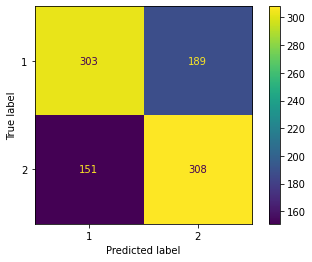

In [ ]:
# split the data into train and test using sklearn
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
# test_size defines test data to be split from train data
# 1/3rd of dataset(training) is used as test dataset
def split_dataset(X, Y, train_ratio, test_ratio, validation_ratio):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))
    return x_train, y_train, x_test, y_test, x_val, y_val
    # split the dataset into train, test and validation set using sklearn
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15
# train is now 70% of the entire data set
# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_train, y_train, x_test, y_test, x_val, y_val=split_dataset(X, Y, train_ratio, test_ratio, validation_ratio)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

# RF classifier model
# wandb
#wandb.init(project='RF_en sweep')
# Hyperparameter tuning sweeps

#config = wandb.config
classifier=RandomForestClassifier(n_estimators=1000)

# fit the training data into the base model
classifier.fit(x_train, y_train)

#wandb.log({'accuracy': accuracy_score})

# predicted values from the model
y_pred=classifier.predict(x_test)
y_probas=classifier.predict_proba(x_test)

#wandb.log({'accuracy': accuracy_score(y_test, y_pred)})

#count=20
#wandb.agent(sweep_id,count=count)

# accuracy prediction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# classification report
print("Classification report:\n")
print(classification_report(y_test, y_pred))

# confusion matrix
conf=confusion_matrix(y_test, y_pred)
print("Confusion matrix\n", conf)


# confusion matrix plot
print("Confusion matrix plot:\n")
plot_confusion_matrix(classifier, x_test, y_test)

In [ ]:
import shap
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x_test)

In [ ]:
shap_values

[array([[ 7.29348578e-03,  1.26329987e-04, -8.88443776e-04, ...,
          1.15948252e-03, -7.09682088e-03, -3.34211031e-03],
        [-8.89388042e-03,  1.44204039e-04, -1.48588263e-03, ...,
          8.36465013e-04,  1.29174010e-03,  9.25170444e-04],
        [-3.53473903e-03,  2.20508152e-04,  4.32245226e-03, ...,
          1.99914225e-03,  2.56025017e-03, -1.85890407e-03],
        ...,
        [-2.21057477e-03, -9.03116902e-05, -1.40700265e-03, ...,
         -2.07400887e-03, -7.29062978e-03, -6.03614073e-03],
        [ 5.96956037e-03, -6.68467340e-05, -1.37390983e-03, ...,
         -3.39830380e-04,  6.09749409e-04, -1.62778829e-03],
        [ 7.90432304e-03,  8.32488724e-05,  2.44408025e-03, ...,
         -9.38903147e-04,  3.73986670e-05,  9.38104350e-04]]),
 array([[-7.29348578e-03, -1.26329987e-04,  8.88443776e-04, ...,
         -1.15948252e-03,  7.09682088e-03,  3.34211031e-03],
        [ 8.89388042e-03, -1.44204039e-04,  1.48588263e-03, ...,
         -8.36465013e-04, -1.29174010e

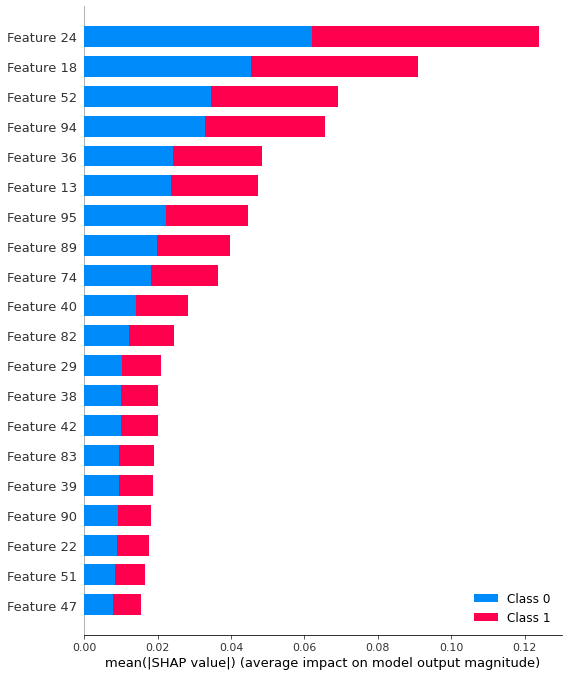

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer()
#docs       = vectorizer.fit_transform(df.clean)
#features   = vectorizer.get_feature_names()
features=df.clean
feature_name=np.array(features)

importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
feature_name = [feature_name[i] for i in indices]
feats=np.array(feature_name)

for f in range(x_train.shape[1]):
    print("%d. feature %d - %s : %f" % (f+1, indices[f], feats[f], importances[indices[f]]))
    #print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_name, importances[indices[f]]))

1. feature 3 - bernie supporters on twitter erupt in anger against the dnc we tried to warn you  : 0.021001
2. feature 45 -  significant pipeline spills already this year exposes troubling safety record : 0.020146
3. feature 29 - syrian war report november syrian military deploys advanced t battle tanks to aleppo : 0.019960
4. feature 0 - you can smell hillary s fear : 0.019374
5. feature 40 - both parties want to craft populist messages for  : 0.018977
6. feature 48 -  he didn t know the boy didn t want to be raped court throws out muslim migrant child sex charge and germans are in shock : 0.018648
7. feature 95 - the mandela effect was made by one overlooked year old man an ascended master video and proof  : 0.017313
8. feature 41 - first take wall street bids goodbye to june hike : 0.016847
9. feature 47 - senate race rankings dems attack as gop lays swing state groundwork : 0.016549
10. feature 56 - ying and yang the gold and silver set up  : 0.016336
11. feature 91 - revelation un

Text(0.5, 0, 'RF feature Importance ')

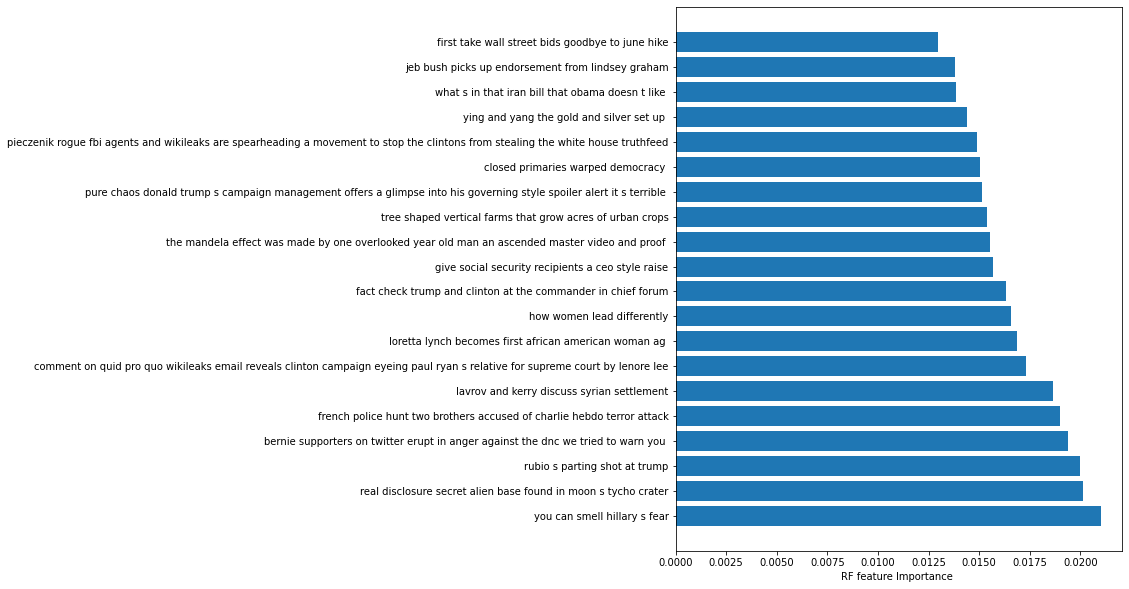

In [ ]:
plt.figure(figsize=(8,10))
plt.barh(feats[indices][:20], importances[indices][:20])
plt.xlabel("RF feature Importance ")

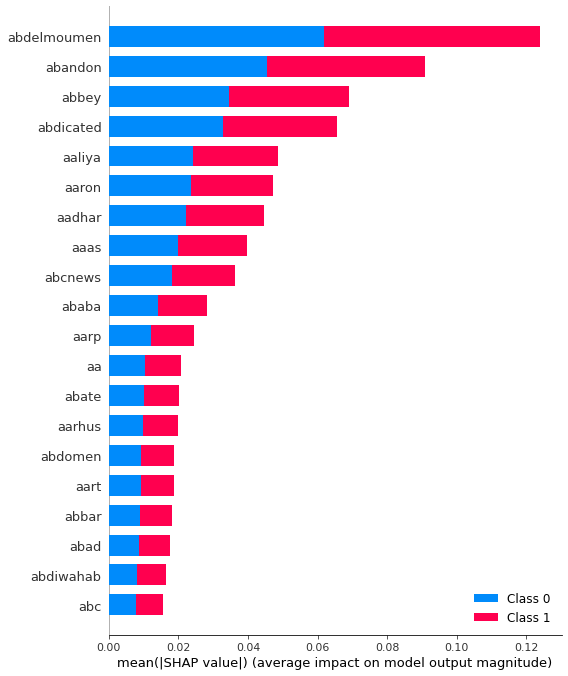

In [ ]:
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=feats)

In [ ]:
# Weights and biases plot

wandb.init(project="RF classifier-english dataset", name="RF-base model")

# Feature importance
wandb.sklearn.plot_feature_importances(classifier)
# metrics summary
wandb.sklearn.plot_summary_metrics(classifier, x_train, y_train, x_test, y_test)
# precision recall
wandb.sklearn.plot_precision_recall(y_test, y_probas, labels=None)
# ROC curve
wandb.sklearn.plot_roc(y_test, y_probas, labels=None)
# Learning curve
wandb.sklearn.plot_learning_curve(classifier, x_train, y_train)
# class proportions
wandb.sklearn.plot_class_proportions(y_train, y_test, labels=None)
# calibration curve
wandb.sklearn.plot_calibration_curve(classifier, X, Y, 'RandomForestClassifier- Base model')
#confusion matrix
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, labels=None)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.
wandb: WARNING This function only supports binary classification at the moment and therefore expects labels to be binary. Skipping calibration curve.


In [ ]:
# parameters cuurently used
print('Parameters currently in use:')
pprint(classifier.get_params())


Parameters currently in use:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Hyperparameter tuning using GridsearchCV
# Setting range of parameters
# Number of trees in random forest
n_estimators = [1000, 2000, 3000, 4000, 5000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 2, 3, 4, 5]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print("\nGRID SEARCH MODEL")
print('Range of parameters used for hyperparameter tuning:')
pprint(param)
# implemented grid search on RF classifier
classifier_grid=GridSearchCV(estimator=classifier, param_grid=param, cv = 3, verbose=2, n_jobs = 4)
# fit the training data
classifier_grid.fit(x_train,y_train)

# Best hyperparameter values
print('Best parameter values:')
print(classifier_grid.best_params_)

# predicted values from the grid search model
cl_g=classifier_grid.best_estimator_
pred=cl_g.predict(x_test)
y_probas = cl_g.predict_proba(x_test)

# accuracy prediction for grid search model
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#classification report
print("Classification report:\n")
print(classification_report(y_test, y_pred))

# confusion matrix
conf_g=confusion_matrix(y_test, pred)
print("Confusion matrix\n", conf_g)

# confusion matrix plot
print("Confusion matrix plot:\n")
plot_confusion_matrix(cl_g, x_test, y_test)
plt.show()


GRID SEARCH MODEL
Range of parameters used for hyperparameter tuning:
{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [1, 2, 3],
 'n_estimators': [1000, 2000, 3000, 4000, 5000]}
Fitting 3 folds for each of 900 candidates, totalling 2700 fits


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df.clean)
features   = vectorizer.get_feature_names()
feature_name=np.array(features)

importances = cl_g.feature_importances_
indices = np.argsort(importances)[::-1]
feature_name = [feature_name[i] for i in indices]
feats=np.array(feature_name)
plt.figure(figsize=(8,10))
plt.barh(feats[indices][:20], importances[indices][:20])
plt.xlabel("RF feature Importance ")

In [ ]:
# Hyperparameter tuning
# Grid search model
wandb.init(project="RF classifier-english dataset", name="RF-gridsearch model")
# Feature importance
wandb.sklearn.plot_feature_importances(cl_g)
# metrics summary
wandb.sklearn.plot_summary_metrics(cl_g, x_train, y_train, x_test, y_test)
# precision recall
wandb.sklearn.plot_precision_recall(y_test, y_probas, labels=None)
# ROC curve
wandb.sklearn.plot_roc(y_test, y_probas, labels=None)
# Learning curve
wandb.sklearn.plot_learning_curve(cl_g, x_train, y_train)
# class proportions
wandb.sklearn.plot_class_proportions(y_train, y_test, labels=None)
# calibration curve
wandb.sklearn.plot_calibration_curve(cl_g, X, Y, 'RandomForestClassifier-Grid search model')
# confusion matrix
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, labels=None)

wandb: WARNING This function only supports binary classification at the moment and therefore expects labels to be binary. Skipping calibration curve.



RANDOM SEARCH MODEL
Range of parameters used for hyperparameter tuning:
{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [1, 2, 3],
 'n_estimators': [1000, 2000, 3000, 4000, 5000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameter values:
{'n_estimators': 4000, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
Accuracy: 85.41%
Classification report:

              precision    recall  f1-score   support

           1       0.87      0.90      0.88      1041
           2       0.90      0.87      0.88      1050

    accuracy                           0.88      2091
   macro avg       0.88      0.88      0.88      2091
weighted avg       0.88      0.88      0.88      2091

Confusion matrix
 [[907 134]
 [171 879]]
Confusion matrix plot:



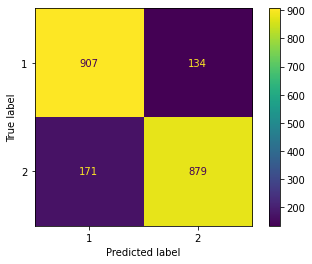

In [ ]:
# Random search implementation
# Module for hyperparameter tuning
# Hyperparameter tuning using RandomizedsearchCV
# Setting range of parameters
# Number of trees in random forest
n_estimators = [1000, 2000, 3000, 4000, 5000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 2, 3, 4, 5]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print("\nRANDOM SEARCH MODEL")
print('Range of parameters used for hyperparameter tuning:')
pprint(param)

# implemented grid search on RF classifier
classifier_random=RandomizedSearchCV(estimator = classifier, param_distributions = param, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# fit the training data in the randomized model
classifier_random.fit(x_train, y_train)

# Best hyperparameter values
print('Best parameter values:')
print(classifier_random.best_params_)

# predicted values from the random search model using best parameters
cl_r=classifier_random.best_estimator_
pred=cl_r.predict(x_test)
y_probas = cl_r.predict_proba(x_test)

# accuracy prediction for random search model
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#classification report
print("Classification report:\n")
print(classification_report(y_test, y_pred))

# confusion matrix
conf_r=confusion_matrix(y_test, pred)
print("Confusion matrix\n", conf_r)

# confusion matrix plot
print("Confusion matrix plot:\n")
plot_confusion_matrix(cl_r, x_test, y_test)


Text(0.5, 0, 'RF feature Importance ')

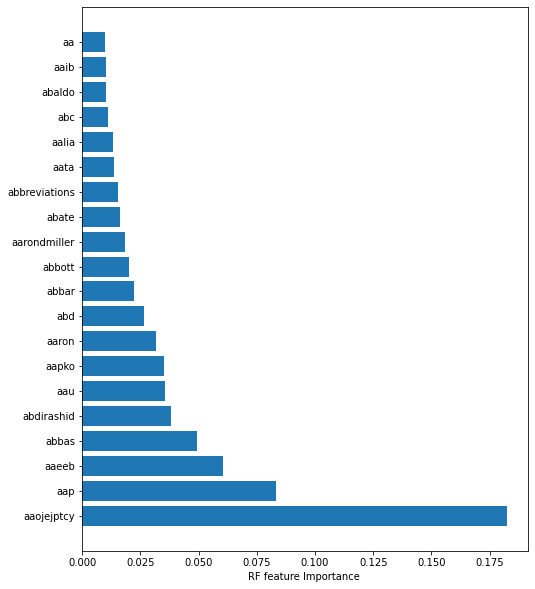

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df.clean)
features   = vectorizer.get_feature_names()
feature_name=np.array(features)

importances = cl_r.feature_importances_
indices = np.argsort(importances)[::-1]
feature_name = [feature_name[i] for i in indices]
feats=np.array(feature_name)
plt.figure(figsize=(8,10))
plt.barh(feats[indices][:20], importances[indices][:20])
plt.xlabel("RF feature Importance ")

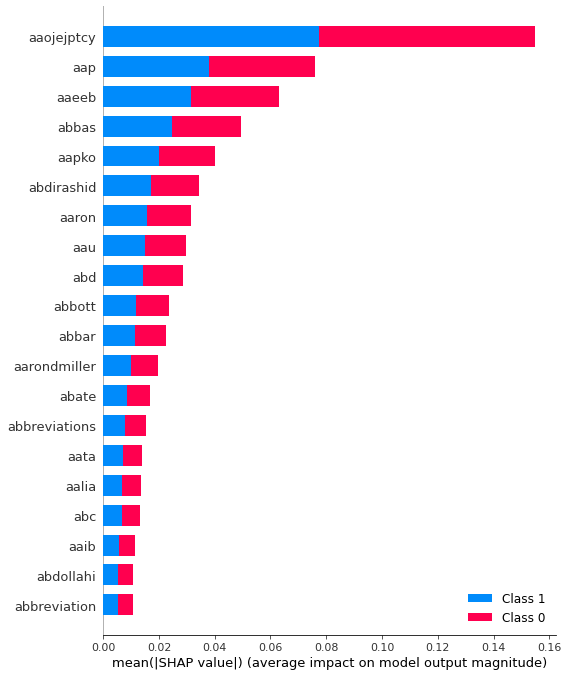

In [ ]:
import shap
explainer = shap.TreeExplainer(cl_r)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=feats)

In [ ]:
wandb.init(project="RF classifier-english dataset", name="RF-random search model")
# Feature importance
wandb.sklearn.plot_feature_importances(cl_r)
# metrics summary
wandb.sklearn.plot_summary_metrics(cl_r, x_train, y_train, x_test, y_test)
# precision recall
wandb.sklearn.plot_precision_recall(y_test, y_probas, labels=None)
# ROC curve
wandb.sklearn.plot_roc(y_test, y_probas, labels=None)
# Learning curve
wandb.sklearn.plot_learning_curve(cl_r, x_train, y_train)
# class proportions
wandb.sklearn.plot_class_proportions(y_train, y_test, labels=None)
# calibration curve
wandb.sklearn.plot_calibration_curve(cl_r, X, Y, 'RandomForestClassifier-Random search model')
# confusion matrix
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, labels=None)

wandb: WARNING This function only supports binary classification at the moment and therefore expects labels to be binary. Skipping calibration curve.


In [ ]:
# Bayesian optimization
print("\nBAYESIAN OPTIMIZATION")
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.choice('max_depth',[1, 2, 3, 4, 5]),
        'max_features': hp.choice('max_features', ['auto', 'sqrt']),
        'min_samples_leaf': hp.choice('min_samples_leaf', [1, 2, 3]),
        'min_samples_split' : hp.choice ('min_samples_split', [1, 2, 3]),
        'n_estimators' : hp.choice('n_estimators', [1000, 2000, 3000, 4000, 5000])
        }
def objective(space):
   model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'],
                                 )
   #5 times cross validation fives 5 accuracies=>mean of these accuracies will be considered
   accuracy = cross_val_score(model, x_train, y_train, cv = 5).mean()
   # We aim to maximize accuracy, therefore we return it as a negative value
   return {'loss': -accuracy, 'status': STATUS_OK }

from sklearn.model_selection import cross_val_score
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt'}
est = {0: 1000, 1: 2000, 2: 3000, 3: 4000, 4: 5000}
print("Best parameters:")
print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])
rf_bayesian=RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'],
                                       max_features = feat[best['max_features']],
                                       min_samples_leaf = best['min_samples_leaf'],
                                       min_samples_split = best['min_samples_split'],
                                       n_estimators = est[best['n_estimators']]).fit(x_train,y_train)
pred_b=rf_bayesian.predict(x_test)
y_probas = rf_bayesian.predict_proba(x_test)
# accuracy prediction
accuracy = accuracy_score(y_test, pred_b)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# classification report
print("Classification report:\n")
print(classification_report(y_test, pred_b))

# confusion matrix
conf=confusion_matrix(y_test, pred_b)
print("Confusion matrix:\n", conf)

# confusion matrix plot
print("Confusion matrix plot:\n")
plot_confusion_matrix(rf_bayesian, x_test, y_test)
plt.show()


BAYESIAN OPTIMIZATION
100%|██████████| 80/80 [1:00:29<00:00, 45.36s/it, best loss: nan]


AssertionError: ignored

In [ ]:
wandb.init(project="RF classifier-english dataset", name="RF-Bayesian optimization model")
# Feature importance
wandb.sklearn.plot_feature_importances(model=rf_bayesian, title="RF-Bayesian model")
# metrics summary
wandb.sklearn.plot_summary_metrics(rf_bayesian, x_train, y_train, x_test, y_test)
# precision recall
wandb.sklearn.plot_precision_recall(y_test, y_probas, labels=None)
# ROC curve
wandb.sklearn.plot_roc(y_test, y_probas, labels=None)
# Learning curve
wandb.sklearn.plot_learning_curve(rf_bayesian, x_train, y_train)
# class proportions
wandb.sklearn.plot_class_proportions(y_train, y_test, labels=None)
# calibration curve
wandb.sklearn.plot_calibration_curve(rf_bayesian, X, Y, 'RandomForestClassifier-Bayesian optimization model')
# confusion matrix
wandb.sklearn.plot_confusion_matrix(y_test, y_pred, labels=None)

wandb: WARNING This function only supports binary classification at the moment and therefore expects labels to be binary. Skipping calibration curve.


In [ ]:
# Exporting metrics from a project in to a CSV file

api = wandb.Api()
entity, project = "tyagilab", "RF classifier-english dataset"
runs = api.runs(entity + "/" + project)

summary_list, config_list, name_list = [], [], []
for run in runs:
    # .summary contains the output keys/values for metrics like accuracy.
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project_en.csv")

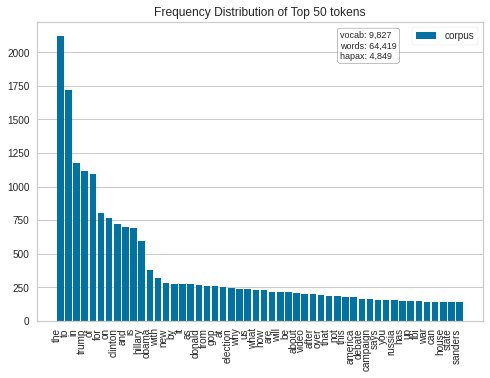

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.text import FreqDistVisualizer


vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df.clean)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

Text(0.5, 0, 'RF feature Importance ')

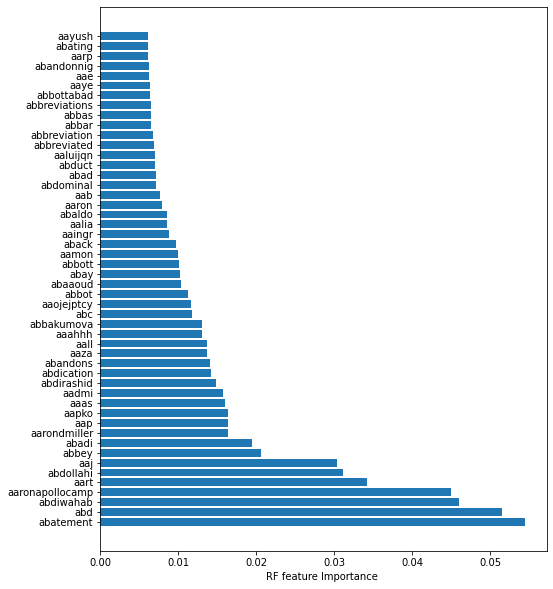

In [ ]:
#Feature importance plot
# use countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(df.clean)
features   = vectorizer.get_feature_names()

# step 2
feature_name=np.array(features)

# step 3
sorted_idx = classifier.feature_importances_.argsort()[::-1]
n_top_features=50
plt.figure(figsize=(8,10))
plt.barh(feature_name[sorted_idx][:n_top_features ],classifier.feature_importances_[sorted_idx][:n_top_features ])
plt.xlabel("RF feature Importance ")

In [ ]:
len(feature_name)

65204

In [ ]:
importance=classifier.feature_importances_
len(importance)

100

In [ ]:
feature_name[sorted_idx]#[:50]

array(['abatement', 'abd', 'abdiwahab', 'aaronapollocamp', 'aart',
       'abdollahi', 'aaj', 'abbey', 'abadi', 'aarondmiller', 'aap',
       'aapko', 'aaas', 'aadmi', 'abdirashid', 'abdication', 'abandons',
       'aaza', 'aall', 'aaahhh', 'abbakumova', 'abc', 'aaojejptcy',
       'abbot', 'abaaoud', 'abay', 'abbott', 'aamon', 'aback', 'aaingr',
       'aalia', 'abaldo', 'aaron', 'aab', 'abdominal', 'abad', 'abduct',
       'aaluijqn', 'abbreviated', 'abbreviation', 'abbar', 'abbas',
       'abbreviations', 'abbottabad', 'aaye', 'aae', 'abandonnig', 'aarp',
       'abating', 'aayush', 'ababa', 'abby', 'abdallah', 'aahing',
       'abatzoglou', 'abated', 'abdikadir', 'aa', 'abdelmoumen', 'aaa',
       'ab', 'abdelhamid', 'aauw', 'aata', 'abandon', 'aaeeb', 'aapne',
       'abandonment', 'abdicated', 'aakhri', 'abdkir', 'abayas', 'aadhar',
       'abdicate', 'abboud', 'aam', 'abcnews', 'aaib', 'aarhus', 'aapke',
       'aaliya', 'aaronson', 'abdrabbuh', 'aachen', 'aakar', 'abbe',
      

In [ ]:
import os
os.environ['WANDB_NOTEBOOK_NAME'] = 'English dataset.ipynb'

In [ ]:
sweep_config = {
  "name" : "random",
  "method" : "random",
  "parameters" : {
    "n_estimators" : {
      "values" : [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    "max_depth" :{
      "values": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]
    },
    "min_samples_leaf":{
        "values":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
    },
    "min_samples_split":{
        "values":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    "epochs":{
        "values":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    }
  }
}

sweep_id = wandb.sweep(sweep_config, project="eng")

wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find English dataset.ipynb.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: 0dqbf5xd
Sweep URL: https://wandb.ai/tyagilab/eng/sweeps/0dqbf5xd


In [ ]:
def train():
    with wandb.init("eng") as run:
        config = wandb.config
        model = RandomForestClassifier(config)
        for epoch in range(config["epochs"]):
            loss = model.fit(x_train,y_train)  # your model training code here
            wandb.log({"accuracy": accuracy_score, "epoch": epoch})

count = 5 # number of runs to execute
wandb.agent(sweep_id, function=train, count=count)

wandb: Agent Starting Run: zovktkaq with config:
wandb: 	epochs: 70
wandb: 	max_depth: 40
wandb: 	min_samples_leaf: 100
wandb: 	min_samples_split: 2
wandb: 	n_estimators: 1600
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find English dataset.ipynb.
wandb: Currently logged in as: navya-tyagi (tyagilab). Use `wandb login --relogin` to force relogin


Run zovktkaq errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
wandb: ERROR Run zovktkaq errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
wandb: Agent Starting Run: kaovfywo with config:
wandb: 	epochs: 80
wandb: 	max_depth: 100
wandb: 	min_samples_leaf: 50
wandb: 	min_samples_split: 4
wandb: 	n_estimators: 1600
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find English dataset.ipynb.


Run kaovfywo errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
wandb: ERROR Run kaovfywo errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
wandb: Agent Starting Run: py3t2eum with config:
wandb: 	epochs: 50
wandb: 	max_depth: 10
wandb: 	min_samples_leaf: 20
wandb: 	min_samples_split: 1
wandb: 	n_estimators: 600
wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find English dataset.ipynb.


Run py3t2eum errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
wandb: ERROR Run py3t2eum errored: ValueError("n_estimators must be an integer, got <class 'wandb.sdk.wandb_config.Config'>.")
Detected 3 failed runs in the first 60 seconds, killing sweep.
wandb: ERROR Detected 3 failed runs in the first 60 seconds, killing sweep.
wandb: To disable this check set WANDB_AGENT_DISABLE_FLAPPING=true


In [ ]:
!pip install transformers
from transformers import PreTrainedTokenizerFast, AutoModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 7.0 MB/s 
     |████████████████████████████████| 6.6 MB 62.3 MB/s 
     |████████████████████████████████| 120 kB 80.2 MB/s 


In [ ]:
# SP Tokens

def get_tokens_from_sp(tokeniser_path: str,
                       special_tokens: list=["<s>", "</s>", "<unk>", "<pad>",
                       "<mask>"]):
    """Take path to ``SentencePiece`` tokeniser + special tokens, return tokens

    The input ``tokeniser_path`` is a ``json`` file generated from the
    ``HuggingFace`` implementation of ``SentencePiece``.

    Args:
        tokeniser_path (str): Path to sequence tokens file
            (from ``SentencePiece``)
        special_tokens (list[str]): Special tokens to substitute for.
            This should match the list of special tokens used in the original
            tokeniser (which defaults to the five special tokens shown here).

    Returns:
        list:

        A list of cleaned tokens corresponding to variable length k-mers.
    """
    # if we dont specify the special tokens below it will break
    tokeniser = PreTrainedTokenizerFast(
        tokenizer_file=tokeniser_path,
        special_tokens=special_tokens,
        bos_token="<s>",
        eos_token="</s>",
        unk_token="<unk>",
        sep_token="<sep>",
        pad_token="<pad>",
        cls_token="<cls>",
        mask_token="<mask>",
        )
    return [x.replace("▁", "") for x in list(tokeniser.vocab.keys())]


In [ ]:
en_tokens = get_tokens_from_sp('news_clean.json')
b_tokens = get_tokens_from_sp('yeast.json')

In [ ]:
en_tokens

['gold',
 '-polling',
 'programming',
 'insult',
 'dollars.',
 'insistence',
 'attribut',
 'Cruickshank',
 '-to-4',
 'adhere',
 '51%',
 'Nutri',
 '-speaking',
 'accounts.',
 'shield',
 'corporate',
 'disposable',
 'trimester',
 'neutrality',
 'Fascist',
 'changed.',
 'iteration',
 'owning',
 'portable',
 'determination',
 'sympathize',
 'Marius',
 'rifle',
 'gathered',
 'outdated',
 'location',
 'ram',
 'SS',
 'Yates',
 'handling',
 'frankly',
 'OpEdNews',
 'ORC',
 'burn',
 'spurious',
 'call.',
 'plague',
 'raw',
 'yelling',
 'mark',
 'hedge',
 'detonated',
 'converted',
 'Feyisa',
 'Divorce',
 'rage',
 'nail',
 'Le',
 'Drunkenmiller',
 'Founder',
 'turmoil',
 'juvenile',
 'debated',
 'Malta',
 'sordid',
 'stunt',
 'Gostkowski',
 'Chair',
 'sociopath',
 'Laussier',
 'plot',
 'expel',
 'haunt',
 'government',
 'resignation',
 'rebate',
 'ano',
 'ranium',
 'second-',
 'Wiccan',
 'Washington,',
 'shackle',
 'crusad',
 'exemplif',
 'ineligible',
 "Sanders'",
 'pontiff',
 'statesman',
 'co

In [ ]:
b_tokens

['TTTTCAT',
 'TTCTTTTATTTT',
 'TACAAAC',
 'GGAAAAGG',
 'GTTCCGAAACT',
 'TCCGTCTAG',
 'AGCGCCTAG',
 'TCCTTGG',
 'AGAGTTGA',
 'TTAGTC',
 'AGAGCTTTAA',
 'GAATTCG',
 'TACGCAT',
 'GAAGATGAC',
 'TTATCTA',
 'TTTCACCTTTT',
 'AATGATACG',
 'TGACTTT',
 'TCCATT',
 'TGTCAAAC',
 'GAAGTCC',
 'TTATCGCA',
 'AAATTC',
 'ACTTTGGGGT',
 'ACACAATCTCATTATC',
 'AGATTGA',
 'GGCGAAATT',
 'CCGAAG',
 'GCAACACCAA',
 'GGATCTACCG',
 'TTATGAAG',
 '',
 'AAGAGG',
 'TGCCTTG',
 'AGATTGTT',
 'GATTATTTAG',
 'GGGAAGAG',
 'TCCTCA',
 'CCTATG',
 'TTTCGGACCT',
 'AAGGAAAGTTA',
 'CCACTGCT',
 'CGATGCCG',
 'TTTAGAATTACA',
 'TCAATGG',
 'GATAATT',
 'GAAGAAC',
 'AATCAG',
 'ATTCTACA',
 'TGTATC',
 'ACGACAGC',
 'GCCCTA',
 'TGAAGT',
 'AGTTGCT',
 'TCATTAT',
 'AGTTT',
 'TGGTTTAT',
 'CAGCCAAGC',
 'ATACCAAGTA',
 'CGAATT',
 'TTTTGCTT',
 'GGAAGATATTG',
 'TGCTTGTG',
 'TAAATCTTCA',
 'TATTATTATGT',
 'GCATCT',
 'CTGAGA',
 'ATCTTTTG',
 'AGCGAT',
 'TCATAG',
 'AAGAAAGA',
 'TTAACCGT',
 'TTTTCCTTTTTCA',
 'GGCGGTAACA',
 'CATCTGCGC',
 'TCAGTCTCCT',
 'CGCCA

In [ ]:
# Minimal reproducible example
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

# !pip install wandb
import wandb

import os
# your notebook name
os.environ['WANDB_NOTEBOOK_NAME'] = 'English dataset.ipynb'

# Dataset
df=pd.read_csv('News_data.csv')

# split data into X and Y
X=np.array([np.array(x) for x in df['array']])
Y=np.array([np.array(x) for x in df['label']])

# split the data into train and test using sklearn
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
# 1/3rd of dataset(training) is used as test dataset

# wandb
# Hyperparameter sweeps
# random
random = {
  "name" : "random",
  "method" : "random",
  "parameters" : {
    "n_estimators" : {
      "values" : [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
    },
    "max_depth" :{
      "values": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]
    },
    "min_samples_leaf":{
        "values":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
    },
    "min_samples_split":{
        "values":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    "epochs":{
        "values":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    }
  }
}

# grid
grid = {
  "name" : "grid",
  "method" : "grid",
  "parameters" : {
    "n_estimators" : {
      "values" : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    },
    "max_depth" :{
      "values": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
    },
    "min_samples_leaf":{
        "values":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
    },
    "min_samples_split":{
        "values":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
    "epochs":{
        "values":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    }
  }
}

sweep_id1 = wandb.sweep(random, project="eng")
sweep_id2 = wandb.sweep(grid, project="eng")


def train():
    with wandb.init("eng") as run:
        config = wandb.config
        model = RandomForestClassifier(config)
        for epoch in range(config["epochs"]):
            loss = model.fit(x_train,y_train)  # your model training code here
            wandb.log({"accuracy": accuracy_score, "epoch": epoch})

count = 5 # number of runs to execute
wandb.agent(sweep_id1, function=train, count=count)
wandb.agent(sweep_id2, function=train, count=count)

# Expected: Uninterrupted execution/ complete 5 runs as given by count
# Obtained: Failed execution/ Execution stops after 3 failed runs.

In [ ]:
data=df_en.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,6325,6326,6327,6328,6329,6330,6331,6332,6333,6334
Unnamed: 0,8476,10294,3608,10142,875,6903,7341,95,4869,2909,...,8411,6143,3262,9337,8737,4490,8062,8622,4021,4330
title,You Can Smell Hillary’s Fear,Watch The Exact Moment Paul Ryan Committed Pol...,Kerry to go to Paris in gesture of sympathy,Bernie supporters on Twitter erupt in anger ag...,The Battle of New York: Why This Primary Matters,"Tehran, USA",Girl Horrified At What She Watches Boyfriend D...,‘Britain’s Schindler’ Dies at 106,Fact check: Trump and Clinton at the 'commande...,Iran reportedly makes new push for uranium con...,...,Will the Media Reset After the Election or Are...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,GOP Senator David Perdue Jokes About Praying f...,Radio Derb Is On The Air–Leonardo And Brazil’s...,Assange claims ‘crazed’ Clinton campaign tried...,State Department says it can't find emails fro...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,Anti-Trump Protesters Are Tools of the Oligarc...,"In Ethiopia, Obama seeks progress on peace, se...",Jeb Bush Is Suddenly Attacking Trump. Here's W...
text,"Daniel Greenfield, a Shillman Journalism Fello...",Google Pinterest Digg Linkedin Reddit Stumbleu...,U.S. Secretary of State John F. Kerry said Mon...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",It's primary day in New York and front-runners...,"\nI’m not an immigrant, but my grandparents ...","Share This Baylee Luciani (left), Screenshot o...",A Czech stockbroker who saved more than 650 Je...,Hillary Clinton and Donald Trump made some ina...,Iranian negotiators reportedly have made a las...,...,Written by Peter Van Buren venerable New Yor...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,The freshman senator from Georgia quoted scrip...,,Julian Assange has claimed the Hillary Clinton...,The State Department told the Republican Natio...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,Anti-Trump Protesters Are Tools of the Oligar...,"ADDIS ABABA, Ethiopia —President Obama convene...",Jeb Bush Is Suddenly Attacking Trump. Here's W...
label,1,1,2,1,2,1,1,2,2,2,...,1,1,2,1,1,2,1,1,2,2
clean,you can smell hillary s fear,watch the exact moment paul ryan committed pol...,kerry to go to paris in gesture of sympathy,bernie supporters on twitter erupt in anger ag...,the battle of new york why this primary matters,tehran usa,girl horrified at what she watches boyfriend d...,britain s schindler dies at,fact check trump and clinton at the commander ...,iran reportedly makes new push for uranium con...,...,will the media reset after the election or are...,doj complaint comey under fire over partisan w...,gop senator david perdue jokes about praying f...,radio derb is on the air leonardo and brazil s...,assange claims crazed clinton campaign tried t...,state department says it can t find emails fro...,the p in pbs should stand for plutocratic or p...,anti trump protesters are tools of the oligarc...,in ethiopia obama seeks progress on peace secu...,jeb bush is suddenly attacking trump here s wh...


In [ ]:
X=np.array([np.array(x) for x in data.loc['array']])
Y=np.array([np.array(x) for x in data.loc['label']])

In [ ]:
X

array([[0.00448701, 0.17669979, 0.56929243, ..., 0.43364534, 0.74992645,
        0.32804793],
       [0.0042616 , 0.14403038, 0.47369203, ..., 0.3619161 , 0.62217629,
        0.26989627],
       [0.00270147, 0.17944007, 0.57765371, ..., 0.44107479, 0.7571277 ,
        0.32917812],
       ...,
       [0.00796713, 0.14717528, 0.48421538, ..., 0.36816832, 0.63761866,
        0.27553895],
       [0.00289341, 0.1227211 , 0.39434594, ..., 0.3032769 , 0.51887071,
        0.22560398],
       [0.00399538, 0.14931589, 0.49420476, ..., 0.37581205, 0.64736617,
        0.28120437]])

In [ ]:
print(X.shape)
print(Y.shape)

(6335, 100)
(6335,)


In [ ]:
def split_dataset(X, Y, train_ratio, test_ratio, validation_ratio):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))
    return x_train, y_train, x_test, y_test, x_val, y_val

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_train, y_train, x_test, y_test, x_val, y_val=split_dataset(X, Y, train_ratio, test_ratio, validation_ratio)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(4434, 100)
(4434,)
(951, 100)
(951,)
(950, 100)
(950,)


In [ ]:
# RF classifier model
classifier=RandomForestClassifier(n_estimators=1000)

# fit the training data into the model
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)
y_probas=classifier.predict_proba(x_test)

# accuracy prediction
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 62.57%


In [ ]:
classifier.feature_importances_

array([0.00814405, 0.01107552, 0.0093627 , 0.00695499, 0.00674111,
       0.00534086, 0.00697629, 0.00532251, 0.00584907, 0.0056264 ,
       0.00491193, 0.0124479 , 0.01004791, 0.0048982 , 0.00569965,
       0.00550451, 0.0053444 , 0.00656914, 0.00493086, 0.00431584,
       0.00811674, 0.00749222, 0.00515992, 0.00543928, 0.00931207,
       0.00520399, 0.01125294, 0.00899585, 0.00621226, 0.01590514,
       0.00726314, 0.02376221, 0.00460168, 0.00425852, 0.00711281,
       0.00988552, 0.00490675, 0.00498724, 0.00488469, 0.0060592 ,
       0.00534025, 0.01545006, 0.00473501, 0.00717185, 0.05293862,
       0.04633292, 0.02551456, 0.0256512 , 0.00543939, 0.00436229,
       0.00627503, 0.02285244, 0.00499346, 0.00522766, 0.00663287,
       0.01192397, 0.01765859, 0.00575239, 0.013741  , 0.01725349,
       0.00675773, 0.01505757, 0.00835332, 0.02090306, 0.00564723,
       0.01084891, 0.0051236 , 0.00546462, 0.00526253, 0.00729241,
       0.02704331, 0.00400144, 0.03520459, 0.01076158, 0.00461

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

#corpus= data.loc['clean']

#vectorizer = CountVectorizer()
#docs       = vectorizer.fit_transform(corpus)
features   = data.loc['clean']
feats=np.array(features)

importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%d. feature %d - %s : %f" % (f+1, indices[f], feats[f], importances[indices[f]]))


1. feature 3 - you can smell hillary s fear : 0.020860
2. feature 48 - watch the exact moment paul ryan committed political suicide at a trump rally video  : 0.019722
3. feature 45 - kerry to go to paris in gesture of sympathy : 0.019573
4. feature 29 - bernie supporters on twitter erupt in anger against the dnc we tried to warn you  : 0.019484
5. feature 0 - the battle of new york why this primary matters : 0.018795
6. feature 95 - tehran usa : 0.018680
7. feature 40 - girl horrified at what she watches boyfriend do after he left facetime on : 0.018051
8. feature 47 -  britain s schindler dies at  : 0.017111
9. feature 56 - fact check trump and clinton at the commander in chief forum : 0.016435
10. feature 41 - iran reportedly makes new push for uranium concessions in nuclear talks : 0.016225
11. feature 9 - with all three clintons in iowa a glimpse at the fire that has eluded hillary clinton s campaign : 0.016166
12. feature 6 - donald trump s shockingly weak delegate game somehow go

Text(0.5, 0, 'RF feature Importance ')

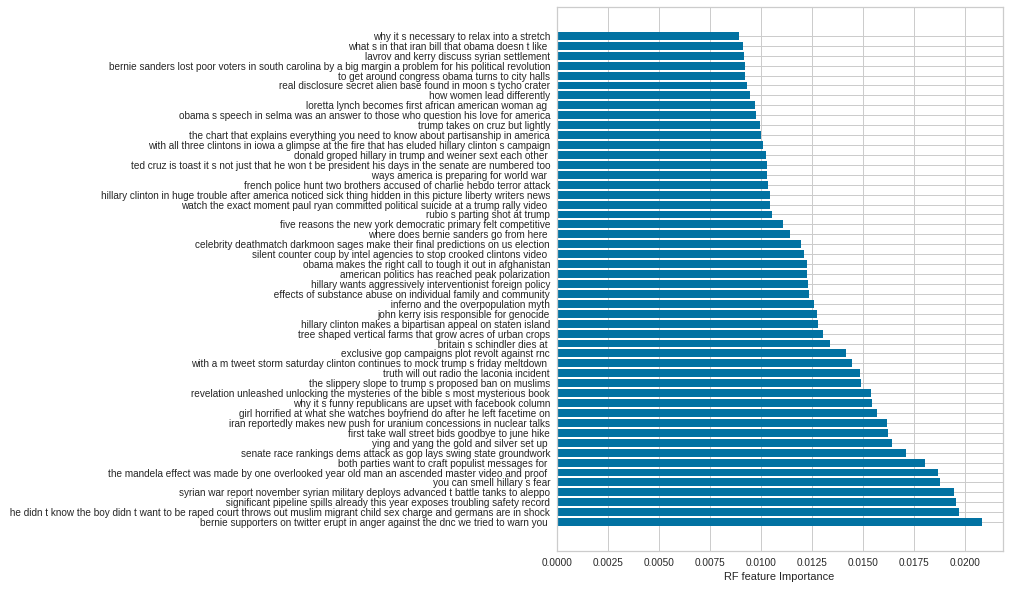

In [ ]:
#sorted_idx = classifier.feature_importances_.argsort()#[::-1]
n_top_features=50
plt.figure(figsize=(8,10))
plt.barh(feats[indices][:n_top_features], importances[indices][:n_top_features])
plt.xlabel("RF feature Importance ")